# Linear Regression w/o Scikit Learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
data = [
    {'StudyTime': 3, 'Score': 5},
    {'StudyTime': 3, 'Score': 6},
    {'StudyTime': 0, 'Score': 5},
    {'StudyTime': 9, 'Score': 9},
    {'StudyTime': 0, 'Score': 1},
    {'StudyTime': 7, 'Score': 9},
    {'StudyTime': 3, 'Score': 9},
    {'StudyTime': 2, 'Score': 5},
    {'StudyTime': 6, 'Score': 6},
    {'StudyTime': 3, 'Score': 9},
]

In [5]:
df = pd.DataFrame(data)
x = df['StudyTime'].values
y = df['Score'].values

In [6]:
x

array([3, 3, 0, 9, 0, 7, 3, 2, 6, 3])

In [7]:
y

array([5, 6, 5, 9, 1, 9, 9, 5, 6, 9])

## Pedhazur Method

In [8]:
x_mean = np.mean(x)
y_mean = np.mean(y)
xy_mean = np.mean(x * y)
x_sq_mean = np.mean(x**2)


In [10]:
B1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
B1

np.float64(0.6099476439790575)

In [13]:
B0 = y_mean - B1 * x_mean
B0

np.float64(4.204188481675393)

In [17]:
y_pred = B0 + B1 * x
y_pred

array([6.03403141, 6.03403141, 4.20418848, 9.69371728, 4.20418848,
       8.47382199, 6.03403141, 5.42408377, 7.86387435, 6.03403141])

In [18]:
rmse = np.sqrt(np.mean((y - y_pred) ** 2))
rmse 

np.float64(1.8432699148680294)

In [26]:

print(f"Intercept (Pedhazur B0): {B0}")
print(f"Slope (Pedhazur B1): {B1}")

Intercept (Pedhazur B0): 4.204188481675393
Slope (Pedhazur B1): 0.6099476439790575


## Calculus Method

In [20]:
learning_rate = 0.01

In [21]:
epochs = 1000

In [22]:
B0_calc , B1_calc = 0,0

In [29]:
for _ in range(epochs):
    y_pred_calc = B0_calc + B1_calc * x
    error = y_pred_calc - y
    B0_calc -= learning_rate * (2 / len(x)) * np.sum(error)
    B1_calc -= learning_rate * (2 / len(x)) * np.sum(error * x)

In [30]:
print(f"Intercept (Calculus B0): {B0_calc}")
print(f"Slope (Calculus B1): {B1_calc}")

Intercept (Calculus B0): 4.2012827719909795
Slope (Calculus B1): 0.6104644619857059


In [31]:
print(f"Pedhazur Intercept (B0): {B0}")
print(f"Pedhazur Slope (B1): {B1}")
print(f"Calculus Intercept (B0): {B0_calc}")
print(f"Calculus Slope (B1): {B1_calc}")

Pedhazur Intercept (B0): 4.204188481675393
Pedhazur Slope (B1): 0.6099476439790575
Calculus Intercept (B0): 4.2012827719909795
Calculus Slope (B1): 0.6104644619857059


#### Testing Model



In [32]:
study_time_test = 10

In [33]:
pred_test = B0 + B1 * study_time_test  

In [35]:
print(f"Predicted score for 10 hours of study time: {pred_test}")

Predicted score for 10 hours of study time: 10.30366492146597


#### Plotting Graphs


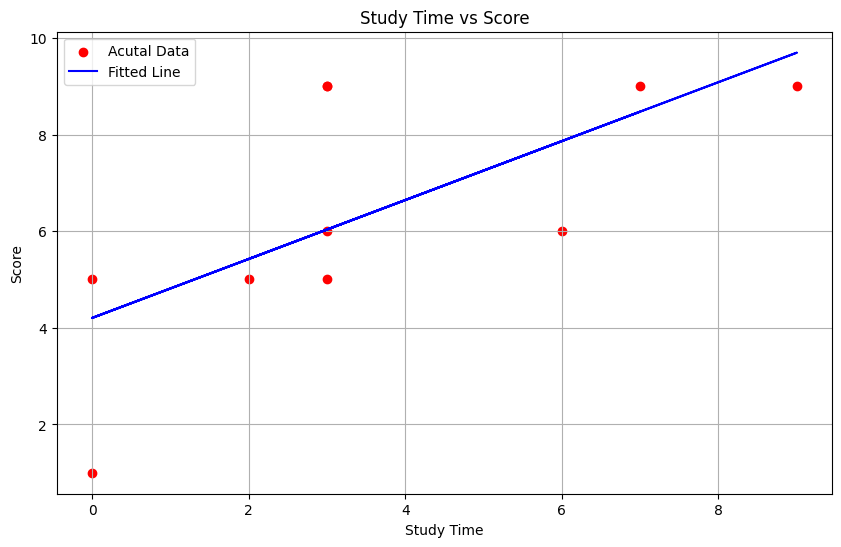

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,color = 'red',label='Acutal Data')
plt.plot(x,y_pred,color ='blue',label="Fitted Line")
plt.xlabel('Study Time')
plt.ylabel('Score')
plt.title('Study Time vs Score')
plt.legend()
plt.grid(True)
plt.show()